In [1]:
import pandas as pd
#import spacetimeformer
data = pd.read_csv('2015年GBDT输入数据集csv版_各网格数量.csv')
%load_ext autoreload
%autoreload 2
data.index = pd.date_range(start="2015-01-01 00:00:00", end="2015-12-31 23:00:00", freq="H")
data

,month,week,hour,weather,temperature,grid1,grid2,grid3,grid4,grid5,...,grid28,grid29,grid30,grid31,grid32,grid33,grid34,grid35,grid36,grid37
2015-01-01 00:00:00,1,4,0,1,-2,322,171,254,410,526,...,1216,175,251,597,374,430,186,189,222,78
2015-01-01 01:00:00,1,4,1,1,-2,426,296,312,426,522,...,1531,229,294,758,457,525,295,240,119,4
2015-01-01 02:00:00,1,4,2,1,-2,415,225,249,385,536,...,1337,120,257,579,312,392,208,191,9,5
2015-01-01 03:00:00,1,4,3,1,-3,315,175,199,454,696,...,827,68,126,341,176,268,116,116,22,3
2015-01-01 04:00:00,1,4,4,1,-3,159,109,122,264,537,...,501,38,93,200,95,125,68,84,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,12,4,19,1,7,329,182,341,219,222,...,1061,224,271,474,417,340,239,129,353,412
2015-12-31 20:00:00,12,4,20,1,7,339,185,397,248,282,...,1091,246,284,528,435,383,221,178,462,304
2015-12-31 21:00:00,12,4,21,1,7,365,168,351,246,286,...,1106,186,208,528,419,421,210,144,524,370
2015-12-31 22:00:00,12,4,22,1,6,288,175,261,245,343,...,837,174,183,444,372,358,194,135,527,275


In [2]:
%load_ext autoreload
%autoreload 2
from tensorflow.python.framework.ops import disable_eager_execution
import tensorflow as tf

disable_eager_execution()  # for graph mode
tf.compat.v1.experimental.output_all_intermediates(True)
#from time_series.dataset.utils import get_energy_demand
from time_series.dataset.time_series import TrainingDataSet
import pandas as pd
import pyreadr
from sklearn.preprocessing import StandardScaler



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = data[['grid1', 'grid2',
       'grid3', 'grid4', 'grid5', 'grid6', 'grid7', 'grid8', 'grid9', 'grid10',
       'grid11', 'grid12', 'grid13', 'grid14', 'grid15', 'grid16', 'grid17',
       'grid18', 'grid19', 'grid20', 'grid21', 'grid22', 'grid23', 'grid24',
       'grid25', 'grid26', 'grid27', 'grid28', 'grid29', 'grid30', 'grid31',
       'grid32', 'grid33', 'grid34', 'grid35', 'grid36', 'grid37']]
train_df = pd.DataFrame(data=StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
#tds = TrainingDataSet(df)
tds = TrainingDataSet(df = train_df,lag = 24)

In [4]:
from time_series.models.LSTM import LSTM
lstm = LSTM(tds)
lstm.instantiate_and_fit(verbose=1, epochs=100)
#y_predicted = lstm.model.predict(tds.X_test, steps=10)
#evaluate_model(first_n=10)
print(lstm.model.evaluate(tds.X_test, tds.y_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 37)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 24, 100)           55200     
_________________________________________________________________
dense (Dense)                (None, 24, 37)            3737      
Total params: 58,937
Trainable params: 58,937
Non-trainable params: 0
_________________________________________________________________
None
Train on 7008 samples
Epoch 1/100
7008/7008 [==============================] - 1s 208us/sample - loss: 0.2894 - mean_absolute_percentage_error: 414.3642 - mae: 0.3771 - mse: 0.2894
Epoch 2/100
7008/7008 [==============================] - 1s 176us/sample - loss: 0.1482 - mean_absolute_percentage_error: 323.8440 - mae: 0.2638 - mse: 0.1482
Epoch 3/100
7008/7008 [===================

7008/7008 [==============================] - 1s 170us/sample - loss: 0.0495 - mean_absolute_percentage_error: 182.6584 - mae: 0.1517 - mse: 0.0495
Epoch 48/100
7008/7008 [==============================] - 1s 170us/sample - loss: 0.0491 - mean_absolute_percentage_error: 176.2292 - mae: 0.1510 - mse: 0.0491
Epoch 49/100
7008/7008 [==============================] - 1s 169us/sample - loss: 0.0494 - mean_absolute_percentage_error: 176.9113 - mae: 0.1516 - mse: 0.0494
Epoch 50/100
7008/7008 [==============================] - 1s 170us/sample - loss: 0.0484 - mean_absolute_percentage_error: 175.6547 - mae: 0.1501 - mse: 0.0484
Epoch 51/100
7008/7008 [==============================] - 1s 170us/sample - loss: 0.0480 - mean_absolute_percentage_error: 181.0204 - mae: 0.1495 - mse: 0.0480
Epoch 52/100
7008/7008 [==============================] - 1s 170us/sample - loss: 0.0479 - mean_absolute_percentage_error: 177.9417 - mae: 0.1495 - mse: 0.0479
Epoch 53/100
7008/7008 [=============================

7008/7008 [==============================] - 1s 170us/sample - loss: 0.0396 - mean_absolute_percentage_error: 157.4486 - mae: 0.1373 - mse: 0.0396
Epoch 99/100
7008/7008 [==============================] - 1s 170us/sample - loss: 0.0397 - mean_absolute_percentage_error: 156.1456 - mae: 0.1375 - mse: 0.0397
Epoch 100/100
7008/7008 [==============================] - 1s 174us/sample - loss: 0.0396 - mean_absolute_percentage_error: 154.7812 - mae: 0.1374 - mse: 0.0396
[0.19352803165437998, 291.58432, 0.28410944, 0.19352803]


C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2323: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2323: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


MSE: 0.1935
----------
grid1: 0.06
grid2: 0.09
grid3: 0.06
grid4: 0.09
grid5: 0.1
grid6: 0.08
grid7: 0.09
grid8: 0.13
grid9: 0.1
grid10: 0.08
grid11: 0.11
grid12: 0.12
grid13: 0.08
grid14: 0.07
grid15: 0.08
grid16: 0.12
grid17: 0.09
grid18: 0.08
grid19: 0.06
grid20: 0.08
grid21: 0.2
grid22: 0.05
grid23: 0.06
grid24: 0.05
grid25: 0.05
grid26: 0.08
grid27: 0.04
grid28: 0.08
grid29: 0.09
grid30: 0.06
grid31: 0.08
grid32: 0.06
grid33: 0.08
grid34: 0.09
grid35: 0.28
grid36: 0.12
grid37: 0.11


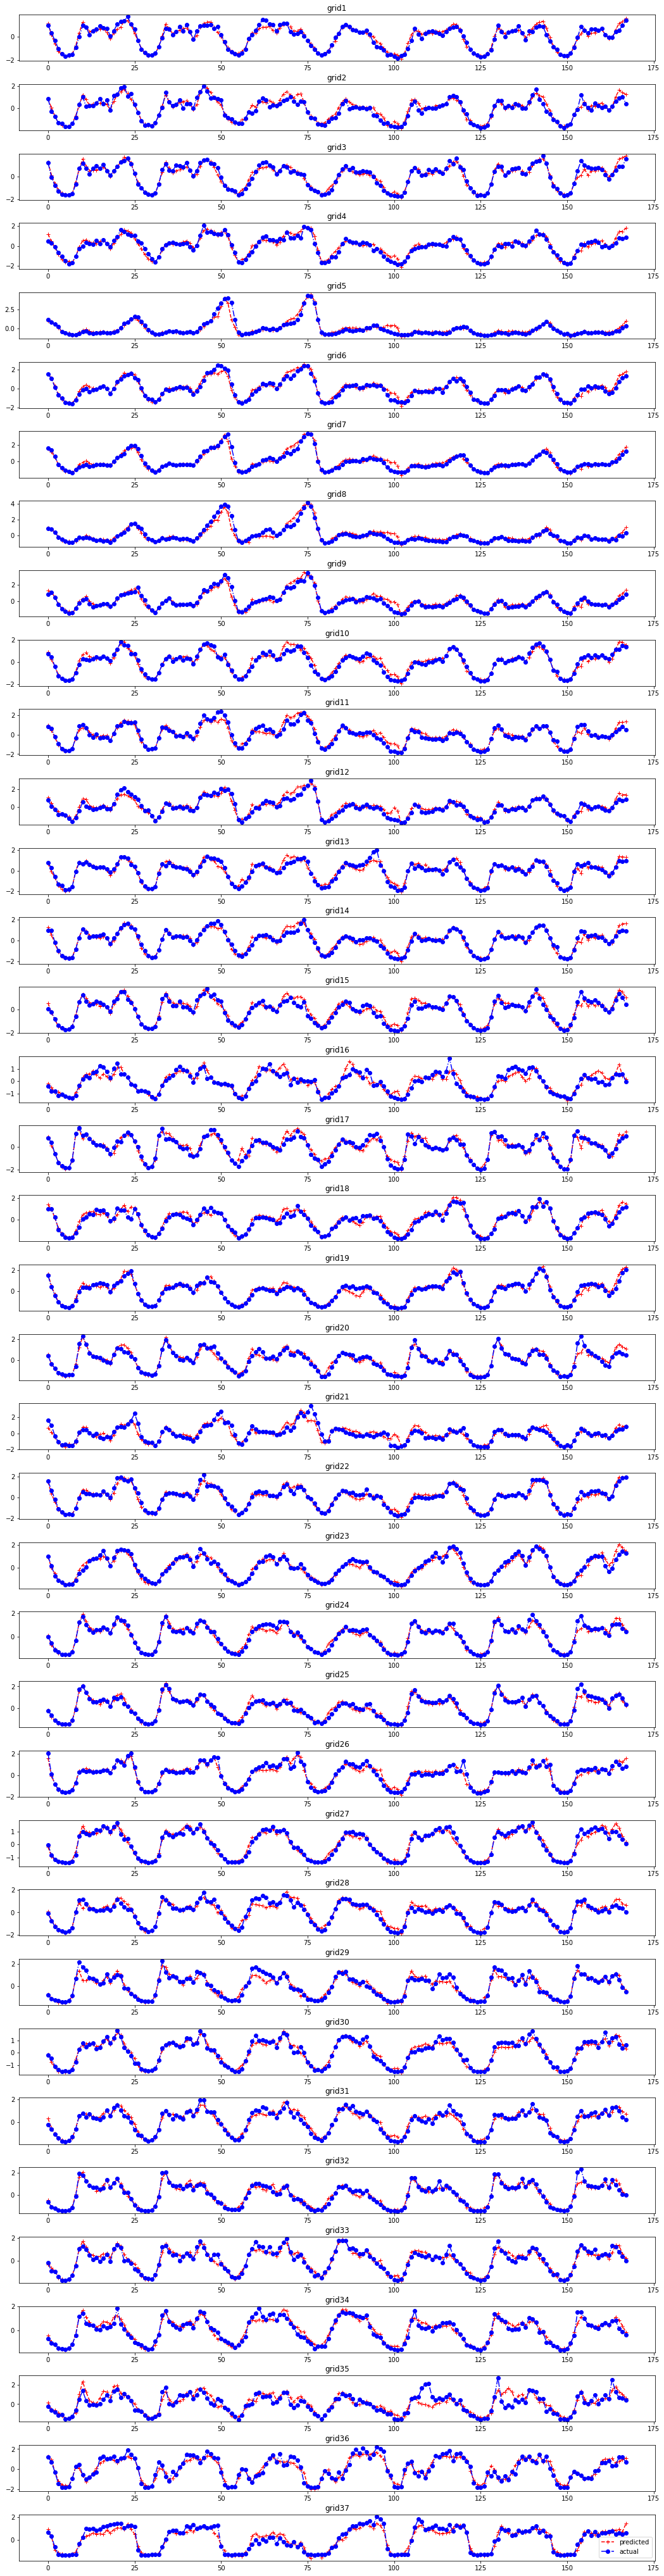

In [5]:
from time_series.utils import evaluate_model
y_predicted = lstm.model.predict(tds.X_test)
evaluate_model(tds=tds, y_predicted=y_predicted, columns=train_df.columns, first_n=24*7)

In [6]:
lstm